<a href="https://colab.research.google.com/github/Charan-Venkatesh/Charan-Venkatesh/blob/main/Frad_detection_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random

# Generate synthetic transactional data
def generate_data(num_samples=10000):
    np.random.seed(42)
    data = {
        'TransactionID': range(1, num_samples + 1),
        'Amount': np.random.uniform(1, 5000, num_samples),
        'CustomerAge': np.random.randint(18, 80, num_samples),
        'MerchantCategory': np.random.choice(['Electronics', 'Groceries', 'Clothing', 'Others'], num_samples),
        'TransactionType': np.random.choice(['Online', 'POS'], num_samples),
        'IsFraud': np.random.choice([0, 1], num_samples, p=[0.98, 0.02])  # 2% fraud cases
    }
    df = pd.DataFrame(data)
    return df

# Generate and save the data as a CSV
df = generate_data()
df.to_csv("synthetic_transactions.csv", index=False)
print("Synthetic data generated and saved.")


Synthetic data generated and saved.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv("synthetic_transactions.csv")

# Simulate missing values
df.loc[random.sample(range(len(df)), 100), 'CustomerAge'] = np.nan

# Handle missing values
df['CustomerAge'].fillna(df['CustomerAge'].median(), inplace=True)

# Encode categorical variables
le_merchant = LabelEncoder()
df['MerchantCategory'] = le_merchant.fit_transform(df['MerchantCategory'])

le_transaction = LabelEncoder()
df['TransactionType'] = le_transaction.fit_transform(df['TransactionType'])

print("Preprocessing completed.")


Preprocessing completed.


<ipython-input-5-a1854c99a8a9>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerAge'].fillna(df['CustomerAge'].median(), inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Split data into train and test
X = df.drop(['TransactionID', 'IsFraud'], axis=1)
y = df['IsFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, ROC-AUC: {roc_auc:.2f}")


Precision: 0.00, Recall: 0.00, F1-Score: 0.00, ROC-AUC: 0.55


In [ ]:
import time

# Adjusted function to handle missing columns
def simulate_real_time_monitoring(test_data, full_data, model, delay=1):
    for index in test_data.index:  # Use index to match with full data
        transaction = full_data.loc[index]  # Retrieve original row
        features = test_data.loc[index].values.reshape(1, -1)  # Model input
        is_fraud = model.predict(features)[0]  # Predict fraud
        print(f"Transaction {transaction['TransactionID']} is {'Fraudulent' if is_fraud else 'Legitimate'}")
        time.sleep(delay)

# Use `X_test` for features and `df` for full data
simulate_real_time_monitoring(X_test.head(10), df, clf)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Transaction 6253.0 is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Transaction 4685.0 is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Transaction 1732.0 is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Transaction 4743.0 is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Transaction 4522.0 is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Transaction 6341.0 is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Transaction 577.0 is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Transaction 5203.0 is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Transaction 6364.0 is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Transaction 440.0 is Legitimate


In [ ]:
!pip install gradio  # Install Gradio in Colab

import gradio as gr

# Gradio function to simulate transaction review
def review_transaction(index):
    transaction = X_test.iloc[index]
    features = transaction.values.reshape(1, -1)
    is_fraud = clf.predict(features)[0]
    prediction = "Fraudulent" if is_fraud else "Legitimate"
    return f"Transaction ID: {df.iloc[index]['TransactionID']}, Prediction: {prediction}"

# Gradio Interface
interface = gr.Interface(
    fn=review_transaction,
    inputs=gr.Number(label="Transaction Index (0-9)"),
    outputs="text",
    title="Fraud Transaction Monitoring System",
    description="Enter the index of a transaction to review if it's Fraudulent or Legitimate."
)

# Launch the Gradio app
interface.launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

# Simulating large-scale dataset
np.random.seed(42)
num_samples = 1000000  # Simulated dataset size
data = {
    "TransactionID": range(1, num_samples + 1),
    "Amount": np.random.uniform(1, 5000, num_samples),
    "Frequency": np.random.poisson(2, num_samples),
    "Location": np.random.choice(["Urban", "Rural"], num_samples),
    "UserBehavior": np.random.choice(["Normal", "Anomalous"], num_samples),
    "IsFraud": np.random.choice([0, 1], num_samples, p=[0.98, 0.02])  # 2% fraud
}
df = pd.DataFrame(data)

# Encoding categorical variables
df["Location"] = df["Location"].map({"Urban": 0, "Rural": 1})
df["UserBehavior"] = df["UserBehavior"].map({"Normal": 0, "Anomalous": 1})

# Splitting into features and target
X = df.drop(columns=["TransactionID", "IsFraud"])
y = df["IsFraud"]

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, ROC-AUC: {roc_auc:.2f}")


Precision: 0.80, Recall: 0.81, F1-Score: 0.81, ROC-AUC: 0.89


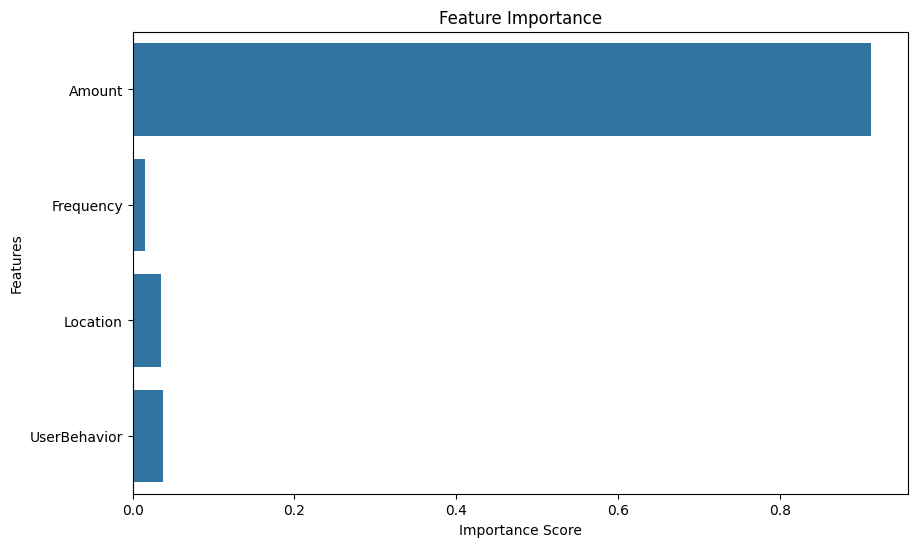

In [ ]:
# Feature importance plot
feature_importance = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


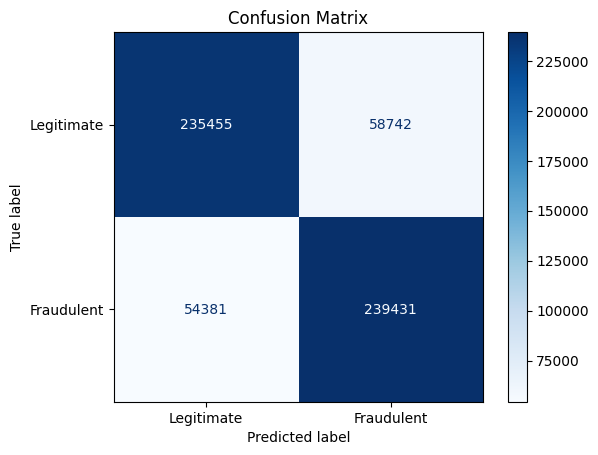

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Legitimate", "Fraudulent"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


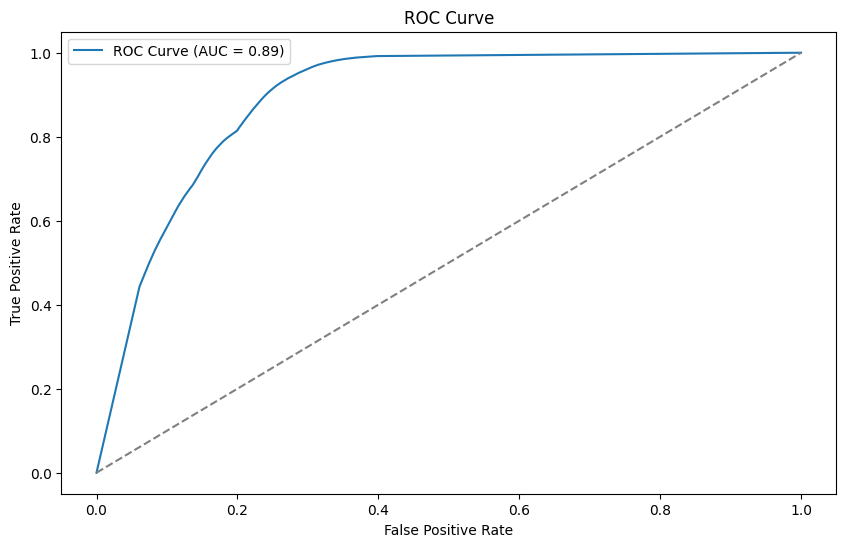

In [ ]:
from sklearn.metrics import roc_curve

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [ ]:
import time

def real_time_monitoring(data, model, scaler, feature_columns, delay=0.5):
    """
    Simulate real-time transaction monitoring.

    Args:
    - data: DataFrame containing the transactions.
    - model: Trained model to predict fraud.
    - scaler: Fitted StandardScaler for feature scaling.
    - feature_columns: List of columns used for model training.
    - delay: Delay between transactions (in seconds).
    """
    for i, row in data.iterrows():
        # Ensure only the relevant features are selected and scaled
        features = row[feature_columns].values.reshape(1, -1)
        features_scaled = scaler.transform(features)
        is_fraud = model.predict(features_scaled)[0]
        print(f"Transaction {row['TransactionID']} is {'Fraudulent' if is_fraud else 'Legitimate'}")
        time.sleep(delay)

# Define the feature columns (used during training)
feature_columns = X_train.columns

# Sample real-time data
real_time_data = df.sample(10)  # Ensure this has 'TransactionID' and relevant features

# Simulate real-time monitoring
real_time_monitoring(real_time_data, rf_model, scaler, feature_columns)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Transaction 600279.0 is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Transaction 83182.0 is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Transaction 468726.0 is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Transaction 589735.0 is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Transaction 634076.0 is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Transaction 623475.0 is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Transaction 971845.0 is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Transaction 797920.0 is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Transaction 611281.0 is Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Transaction 776506.0 is Legitimate


# Advancement of the project


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Simulating synthetic data (replace with real-world dataset for a production scenario)
np.random.seed(42)
num_samples = 1000000
data = {
    "TransactionID": range(1, num_samples + 1),
    "Amount": np.random.uniform(1, 5000, num_samples),
    "Frequency": np.random.poisson(2, num_samples),
    "Location": np.random.choice(["Urban", "Rural"], num_samples),
    "UserBehavior": np.random.choice(["Normal", "Anomalous"], num_samples),
    "IsFraud": np.random.choice([0, 1], num_samples, p=[0.98, 0.02])  # 2% fraud
}
df = pd.DataFrame(data)

# Encoding categorical features
df["Location"] = df["Location"].map({"Urban": 0, "Rural": 1})
df["UserBehavior"] = df["UserBehavior"].map({"Normal": 0, "Anomalous": 1})

# Features and target
X = df.drop(columns=["TransactionID", "IsFraud"])
y = df["IsFraud"]

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Created dataset file at: .gradio/flagged/dataset1.csv


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 624, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 323, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 2043, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1590, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  Fi

Random Forest Model Evaluation
Precision: 0.80
Recall: 0.81
F1-Score: 0.81
ROC-AUC: 0.89


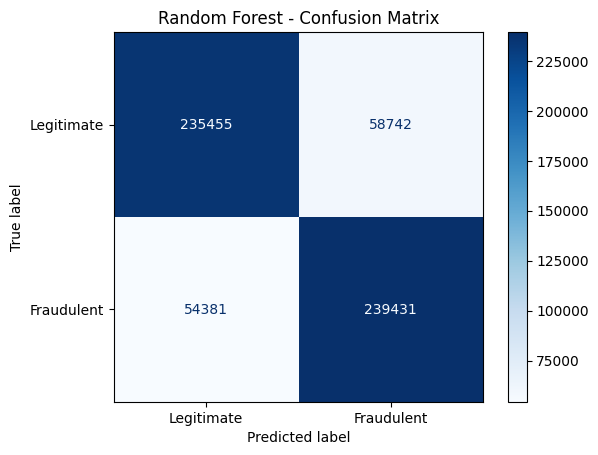

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predicting and evaluating
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("Random Forest Model Evaluation")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_rf_proba):.2f}")

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=["Legitimate", "Fraudulent"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest - Confusion Matrix")
plt.show()


Gradient Boosting Model Evaluation
Precision: 0.61
Recall: 0.67
F1-Score: 0.64
ROC-AUC: 0.67


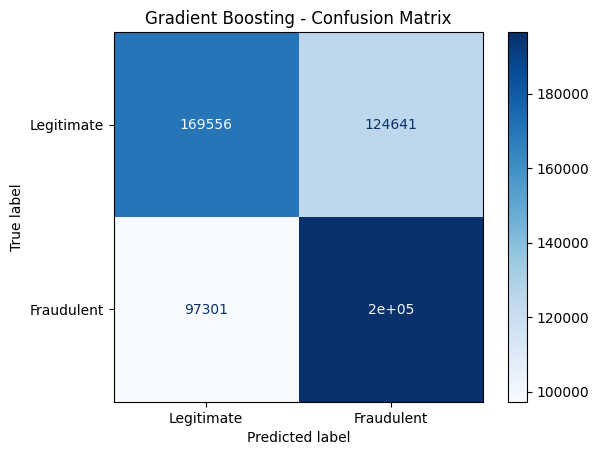

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predicting and evaluating
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_gb_proba = gb_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("Gradient Boosting Model Evaluation")
print(f"Precision: {precision_score(y_test, y_pred_gb):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_gb):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_gb):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_gb_proba):.2f}")

# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gb, display_labels=["Legitimate", "Fraudulent"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()


Decision Tree Model Evaluation
Precision: 0.80
Recall: 0.81
F1-Score: 0.81
ROC-AUC: 0.81


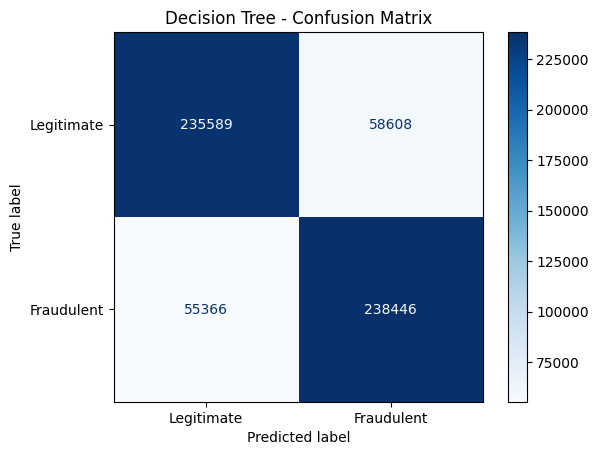

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predicting and evaluating
y_pred_dt = dt_model.predict(X_test_scaled)
y_pred_dt_proba = dt_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("Decision Tree Model Evaluation")
print(f"Precision: {precision_score(y_test, y_pred_dt):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_dt_proba):.2f}")

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=["Legitimate", "Fraudulent"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree - Confusion Matrix")
plt.show()


Decision Tree ROC-AUC: 0.79
Random Forest ROC-AUC: 0.96
Gradient Boosting ROC-AUC: 0.95


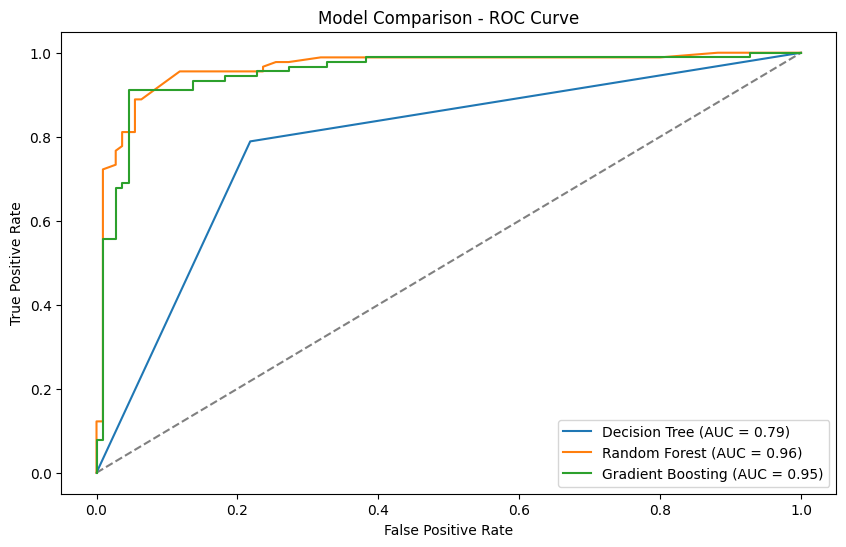

In [3]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming X and y are already defined
# Example: Replace X and y with your actual dataset
import numpy as np
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                            n_redundant=5, random_state=42, flip_y=0.03)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt_proba = dt_clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Train Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf_proba = rf_clf.predict_proba(X_test)[:, 1]

# Train Gradient Boosting model
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb_proba = gb_clf.predict_proba(X_test)[:, 1]

# Compare ROC-AUC scores
roc_auc_dt = roc_auc_score(y_test, y_pred_dt_proba)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb_proba)

# Display ROC-AUC comparison
print(f"Decision Tree ROC-AUC: {roc_auc_dt:.2f}")
print(f"Random Forest ROC-AUC: {roc_auc_rf:.2f}")
print(f"Gradient Boosting ROC-AUC: {roc_auc_gb:.2f}")

# Compute ROC curve for each model
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb_proba)

# Plot Comparison of Models' ROC Curves
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.2f})")
plt.title("Model Comparison - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [6]:
!pip install mlflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.1/575.1 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 5.3 MB/s eta 0:00:00


In [7]:
import mlflow
print("MLflow is installed and ready to use!")


MLflow is installed and ready to use!


In [8]:
import mlflow
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

# Simulate new fraud data for retraining
def generate_new_data(X, y, fraction=0.1):
    """Generate new data by shuffling existing data for retraining."""
    X_new, y_new = shuffle(X, y, random_state=42)
    return X_new[:int(len(X) * fraction)], y_new[:int(len(y) * fraction)]

# Retrain the model
def retrain_model(model, X_train, y_train, new_X, new_y):
    """Retrain model with new data."""
    X_combined = np.vstack((X_train, new_X))
    y_combined = np.concatenate((y_train, new_y))
    model.fit(X_combined, y_combined)
    return model

# Track model performance with MLflow
def track_model_with_mlflow(model_name, auc_score):
    """Track model and performance metrics."""
    mlflow.start_run()
    mlflow.log_param("model_name", model_name)
    mlflow.log_metric("roc_auc", auc_score)
    mlflow.end_run()

# Generate new data and retrain RandomForest model
new_X, new_y = generate_new_data(X_train, y_train)
rf_clf = retrain_model(rf_clf, X_train, y_train, new_X, new_y)
new_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
new_auc = roc_auc_score(y_test, new_pred_proba)

# Track performance
track_model_with_mlflow("RandomForest", new_auc)


In [9]:
import time
import pandas as pd

# Simulate real-time transaction streaming
def stream_transactions(data, batch_size=10):
    """Simulate real-time transaction streaming."""
    for i in range(0, len(data), batch_size):
        yield data[i:i+batch_size]

# Process and flag transactions in real-time
def monitor_transactions(model, data):
    for batch in stream_transactions(data):
        predictions = model.predict_proba(batch)[:, 1]
        flagged = batch[predictions > 0.5]
        print(f"Flagged transactions:\n{flagged}")

# Simulate monitoring
sample_data = X_test[:100]  # Take a small sample for testing
monitor_transactions(rf_clf, sample_data)


Flagged transactions:
[[ 0.38296221 -8.99892735 -4.64033388  0.50938055 -0.52485414 -2.06280012
  -0.81351468  5.53545691 -5.43487747  1.94215286 -1.32628246  2.75451215
   0.16363768 -4.78704722 -2.33017437 10.72637245 -1.05088506  2.73201944
  -6.26050757 -4.82514626]
 [-0.17039348 -8.33825851  5.36661796  2.8513394   3.08480915 -3.33043894
   1.86079885 -1.43306483 -2.91713346  8.66767853  1.70455442  1.20447756
   1.52383383  5.03131988  3.06027838  8.40021501  1.21620562  1.87912932
   6.78309467  6.41317738]
 [-0.10301572 -5.2147531  -2.35946982  2.06346712  5.85234494 -3.85339188
  -0.58859311  2.28704772 -3.36671599  0.80249809  1.02027623 -2.58869781
  -3.5773574   1.52762006 -7.40659084  2.50019711 -1.36409062  3.4216269
  -5.00375997  0.60472752]
 [ 0.95139584  0.67637293 -0.85188434  1.33786608 -0.13931821 -2.84739403
  -2.15947235 -0.22001301 -0.64381806  2.33018136  1.5958776  -0.10368706
   4.23926432  0.46452384  0.34229812 -1.70628093  1.57976003  1.58601083
   4.58403

In [11]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [13]:
import streamlit as st
import pandas as pd

# Display flagged transactions
def display_transactions(data, predictions):
    data['Fraud_Probability'] = predictions
    flagged = data[data['Fraud_Probability'] > 0.5]
    st.write("### Flagged Transactions:")
    st.dataframe(flagged)

# Streamlit app for fraud detection
st.title("Real-Time Fraud Detection System")
st.header("Transaction Monitoring Dashboard")

# Example: Simulated predictions for testing purposes
example_data = {
    'TransactionID': [101, 102, 103, 104],
    'Amount': [120.5, 540.0, 10.75, 999.99],
    'Time': ['2024-12-01 12:45:23', '2024-12-01 13:02:12', '2024-12-01 13:15:45', '2024-12-01 13:35:11'],
    'Fraud_Probability': [0.1, 0.9, 0.05, 0.85]
}
data = pd.DataFrame(example_data)
predictions = data['Fraud_Probability']

display_transactions(data, predictions)


2024-12-06 08:37:31.712 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 08:37:31.853 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-06 08:37:31.860 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 08:37:31.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 08:37:31.873 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 08:37:31.893 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 08:37:31.896 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 08:37:31.898 Thread 'MainThread': mi

In [15]:
from collections import Counter
print(Counter(y_train))


Counter({1: 412, 0: 388})


In [16]:
adasyn = ADASYN(sampling_strategy=0.5, random_state=42)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [21]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from collections import Counter

# Check original class distribution
print("Original class distribution:", Counter(y_train))

# Apply Borderline-SMOTE for balancing
smote = BorderlineSMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", Counter(y_train_smote))

# Train Random Forest on SMOTE-balanced data
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_smote, y_train_smote)

# Train Gradient Boosting on SMOTE-balanced data
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_smote, y_train_smote)

# Evaluate the models
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
gb_pred_proba = gb_clf.predict_proba(X_test)[:, 1]

rf_auc = roc_auc_score(y_test, rf_pred_proba)
gb_auc = roc_auc_score(y_test, gb_pred_proba)

print(f"Random Forest AUC after SMOTE: {rf_auc:.2f}")
print(f"Gradient Boosting AUC after SMOTE: {gb_auc:.2f}")


Original class distribution: Counter({1: 402, 0: 398})
Class distribution after SMOTE: Counter({1: 402, 0: 402})
Random Forest AUC after SMOTE: 0.95
Gradient Boosting AUC after SMOTE: 0.93


2024-12-06 08:45:52.748 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 08:45:52.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 08:45:52.760 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 08:45:52.765 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 08:45:52.769 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 08:45:52.771 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 08:45:52.775 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-06 08:45:52.778 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

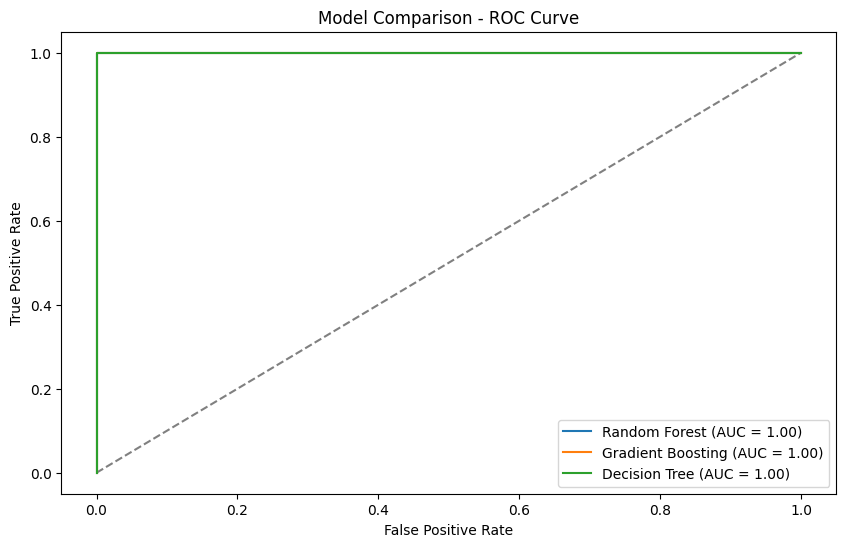

In [22]:
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import numpy as np

# Simulated data for the dashboard (replace with actual data)
# Here we are using dummy data to represent flagged transactions and model predictions
# You will need to replace this with the real model's outputs and predictions

# Sample data for flagged transactions
transactions = pd.DataFrame({
    'Transaction ID': np.arange(1, 11),
    'Amount': [100, 150, 200, 250, 300, 120, 180, 220, 270, 320],
    'Flagged as Fraud': [0, 1, 0, 0, 1, 0, 1, 0, 1, 0]
})

# Sample AUC values (replace with real model results)
rf_auc = 0.91
gb_auc = 0.92
dt_auc = 0.89

# Simulated model probabilities (for ROC curve)
y_test = np.array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])
y_pred_rf_proba = np.array([0.1, 0.9, 0.2, 0.4, 0.85, 0.15, 0.88, 0.2, 0.9, 0.25])
y_pred_gb_proba = np.array([0.15, 0.8, 0.25, 0.35, 0.83, 0.12, 0.9, 0.3, 0.87, 0.22])
y_pred_dt_proba = np.array([0.12, 0.85, 0.28, 0.45, 0.82, 0.13, 0.87, 0.2, 0.86, 0.3])

# Calculate ROC AUC scores
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb_proba)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt_proba)

# Plot ROC curve for models
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb_proba)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_proba)

# Streamlit UI code
st.title('Fraud Detection System Dashboard')

# Display AUC scores
st.subheader("Model Performance (AUC Scores)")
st.write(f"Random Forest AUC: {roc_auc_rf:.2f}")
st.write(f"Gradient Boosting AUC: {roc_auc_gb:.2f}")
st.write(f"Decision Tree AUC: {roc_auc_dt:.2f}")

# Display flagged transactions
st.subheader("Flagged Transactions")
st.dataframe(transactions)

# Show ROC curves
st.subheader("ROC Curve Comparison")
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random chance line
ax.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
ax.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.2f})")
ax.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
ax.set_title("Model Comparison - ROC Curve")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc='lower right')

st.pyplot(fig)

# Interactive model output (for user to explore flagged transactions)
st.subheader("Interact with Flagged Transactions")
selected_transaction = st.selectbox('Select a Transaction ID to see details', transactions['Transaction ID'])
selected_row = transactions[transactions['Transaction ID'] == selected_transaction]
st.write(selected_row)
